# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Gibran Daffa Atallah
- **Email:** gibrandaffa92@gmail.com
- **Cohor ID:** MS042D5Y0575
- **Username:** gibrandaffa

## Menentukan Pertanyaan Bisnis

- Di musim apa sepeda paling sering disewakan?
- Jam berapa sepeda paling sering disewakan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- `day.csv` dan `hour.csv` memiliki data yang sama. Perbedaanya ialah `hour.csv` memiliki data setiap jam dalam 1 hari.
- Beberapa kolom direpresentasikan dengan angka yang mana bisa berupa nama berdasarkan pada `data/README.txt`.

### Assessing Data

#### Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Tidak ada data yang error**

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Tidak ada data yang hilang**

In [7]:
day_df.duplicated().sum()

np.int64(0)

**Tidak ada data yang duplikat.**

**Insight:**
- Error: 0
- Hilang: 0
- Duplikat: 0
- Konversi:
  - `dteday` -> `dteday(datetime)`.
  - `temp` -> `temp * 41` -> `temp(integer)`
  - `atemp` -> `atemp * 50` -> `temp(integer)`
  - `hum` -> `hum * 100` -> `hum(integer)`
  - `windspeed` -> `windspeed * 67` -> `windspeed(integer)`
- Menyederhanakan: `season`, `weekday`, dan `weathersit`.
> Beberapa kolom disederhanakan ke `integer` untuk memudahkan pengukuran.

#### Hour

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Tidak ada data yang error**

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Tidak ada data yang hilang**

In [11]:
hour_df.duplicated().sum()

np.int64(0)

**Tidak ada data yang duplikat.**

**Insight:**
- Error: 0
- Hilang: 0
- Duplikat: 0
- Konversi:
  - `dteday` -> `dteday(datetime)`.
  - `temp` -> `temp * 41` -> `temp(integer)`
  - `atemp` -> `atemp * 50` -> `temp(integer)`
  - `hum` -> `hum * 100` -> `hum(integer)`
  - `windspeed` -> `windspeed * 67` -> `windspeed(integer)`
- Menyederhanakan: `season`, `weekday`, dan `weathersit`.
> Beberapa kolom disederhanakan ke `integer` untuk memudahkan pengukuran.

### Cleaning Data

In [12]:
def clean(df):
    conv_to_int = {
        'temp': 41,
        'atemp': 50,
        'hum': 100,
        'windspeed': 67
    }
    conv_value = {
        'season': ('Spring', 'Summer', 'Autumn', 'Winter'),
        'weekday': ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), # Index di tabel dimulai dari 0 dan bukan 1
        'weathersit': (
            'Clear, Few clouds, Partly cloudy, Partly cloudy',
    		'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    		'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    		'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
        )
    }

    df.dteday = pd.to_datetime(df.dteday)

    for key in conv_to_int:
        df[key] = df[key].apply(lambda item: int(round(item * conv_to_int[key])))
    for key in conv_value:
        df[f'{key}_new'] = df[key].apply(lambda item: conv_value[key][item - 1])

In [13]:
clean(day_df) # tidak usah re-assign karena object bersifat reference
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_new,weekday_new,weathersit_new
0,1,2011-01-01,1,0,1,0,6,0,2,14,18,81,11,331,654,985,Spring,Saturday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
1,2,2011-01-02,1,0,1,0,0,0,2,15,18,70,17,131,670,801,Spring,Sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,3,2011-01-03,1,0,1,0,1,1,1,8,9,44,17,120,1229,1349,Spring,Monday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,4,2011-01-04,1,0,1,0,2,1,1,8,11,59,11,108,1454,1562,Spring,Tuesday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,5,2011-01-05,1,0,1,0,3,1,1,9,11,44,13,82,1518,1600,Spring,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,10,11,65,23,247,1867,2114,Spring,Thursday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
727,728,2012-12-28,1,1,12,0,5,1,2,10,13,59,10,644,2451,3095,Spring,Friday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
728,729,2012-12-29,1,1,12,0,6,0,2,10,12,75,8,159,1182,1341,Spring,Saturday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
729,730,2012-12-30,1,1,12,0,0,0,1,10,12,48,24,364,1432,1796,Spring,Sunday,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [14]:
clean(hour_df)
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_new,weekday_new,weathersit_new
0,1,2011-01-01,1,0,1,0,0,6,0,1,10,14,81,0,3,13,16,Spring,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
1,2,2011-01-01,1,0,1,1,0,6,0,1,9,14,80,0,8,32,40,Spring,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
2,3,2011-01-01,1,0,1,2,0,6,0,1,9,14,80,0,5,27,32,Spring,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,4,2011-01-01,1,0,1,3,0,6,0,1,10,14,75,0,3,10,13,Spring,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,5,2011-01-01,1,0,1,4,0,6,0,1,10,14,75,0,0,1,1,Spring,Saturday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,11,13,60,11,11,108,119,Spring,Monday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,11,13,60,11,8,81,89,Spring,Monday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,11,13,60,11,7,83,90,Spring,Monday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,11,14,56,9,13,48,61,Spring,Monday,"Clear, Few clouds, Partly cloudy, Partly cloudy"


**Insight:**
- Tabel sama yang berarti menggunakan cara yang sama.

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**
- EDA akan dilakukan pada/dengan visualisasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

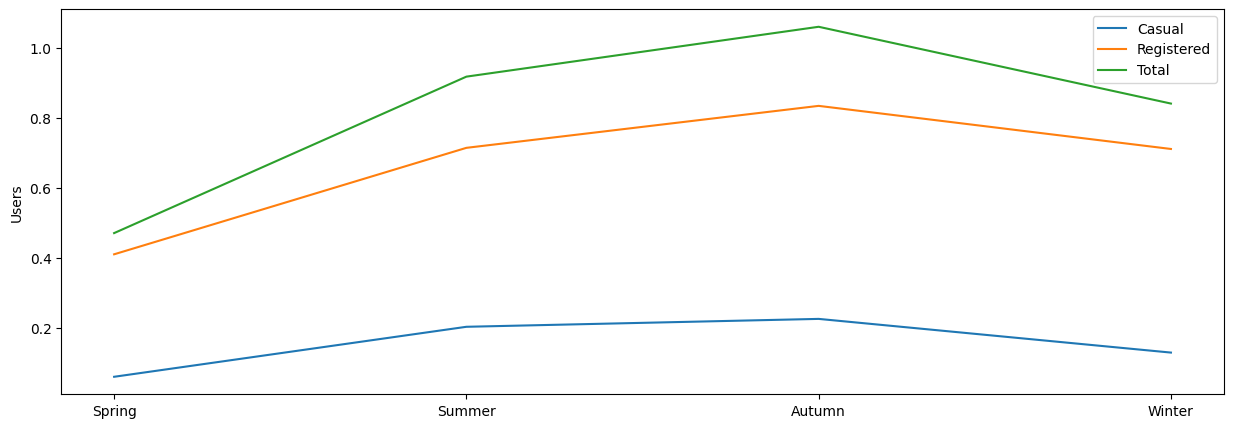

In [50]:
season_df = day_df.groupby(['season', 'season_new']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
}).reset_index()

is_big = (season_df.cnt >= 1e6).sum() # jika total pengguna lebih dari 1 juta

if int(is_big): # menghilangkan notasi ilmiah 1e6 (1 juta+)
    keys = ['casual', 'registered', 'cnt']
    season_df[keys] = season_df[keys].apply(lambda column: column.apply(lambda item: item / 1e6))

plt.figure(figsize = (15, 5))

plt.plot(
    season_df.season_new,
    season_df.casual,
    label = 'Casual'
)
plt.plot(
    season_df.season_new,
    season_df.registered,
    label = 'Registered'
)
plt.plot(
    season_df.season_new,
    season_df.cnt,
    label = 'Total'
)

plt.ylabel(f"Users")
plt.legend()
plt.show()

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2